In [8]:
import csv
import pandas as pd, numpy as np, scipy as s
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
import csv
import pandas as pd, numpy as np, scipy as s
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [9]:
df2 = pd.read_csv("medium_data.csv")

In [10]:
df2.pop("detail_desc")
df2.columns
df1 = df2.pop("article_id")
df2["article_id"] = df1
df = df2.head(100000)
processdf = pd.DataFrame()
for col in df.columns:
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    le_vals = le.transform(df[col])
    processdf[col] = le_vals

In [11]:
X = processdf.iloc[:,:-1].values
y = processdf.iloc[:,33].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
acc = []

In [12]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))

In [13]:
print("SciKitLearn")
print("Naive Bayes")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))

SciKitLearn
Naive Bayes
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
Accuracy, Error
0.296 0.704


In [14]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))

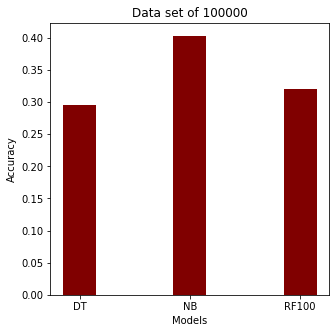

In [17]:
fig = plt.figure(figsize= (5, 5))
labs = ['DT', 'NB', 'RF100']
plt.bar(labs, acc, color ='maroon',
        width = 0.3)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Data set of 100000")
plt.show()

In [16]:
acc

[0.296, 0.403, 0.32]